In [20]:
from DataFiltering import DataFiltering
from DataLoader import DataLoader, DataConcate
from ecgdetectors import Detectors

import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import os

DATA_EXPORT_PATH = "./data/exported/1min/"

ecg_data_filtering = DataFiltering(sampling_rate=250)

# Data Concating

In [21]:
dataconcater = DataConcate()
dataloader = DataLoader()

data_list = os.listdir("./data/walking")
walking_data_list = ["./data/walking" + "/" + data for data in data_list]

data_list = os.listdir("./data/running")
running_data_list = ["./data/running" + "/" + data for data in data_list]

data_list = os.listdir("./data/sitting")
sitting_data_list = ["./data/sitting" + "/" + data for data in data_list]

## Walking data concating

In [22]:
walking_ecg_concate, walking_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in walking_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    walking_ecg_concate = np.concatenate((walking_ecg_concate, ecg), axis=0)
    walking_acc_concate = np.concatenate((walking_acc_concate, acc), axis=0)

walking_ecg_concate, walking_acc_concate = np.array(walking_ecg_concate[1:]), np.array(walking_acc_concate[1:])

print(np.shape(walking_ecg_concate))
print(np.shape(walking_acc_concate))

NON Mobile ./data/walking/ground_walking_test2.txt
NON Mobile ./data/walking/walking_test.txt
MOBILE ./data/walking/mobile_ground_walking_1.txt
MOBILE ./data/walking/mobile_ground_walking_2.txt
NON Mobile ./data/walking/ground_walking_test.txt
(696000,)
(69600,)


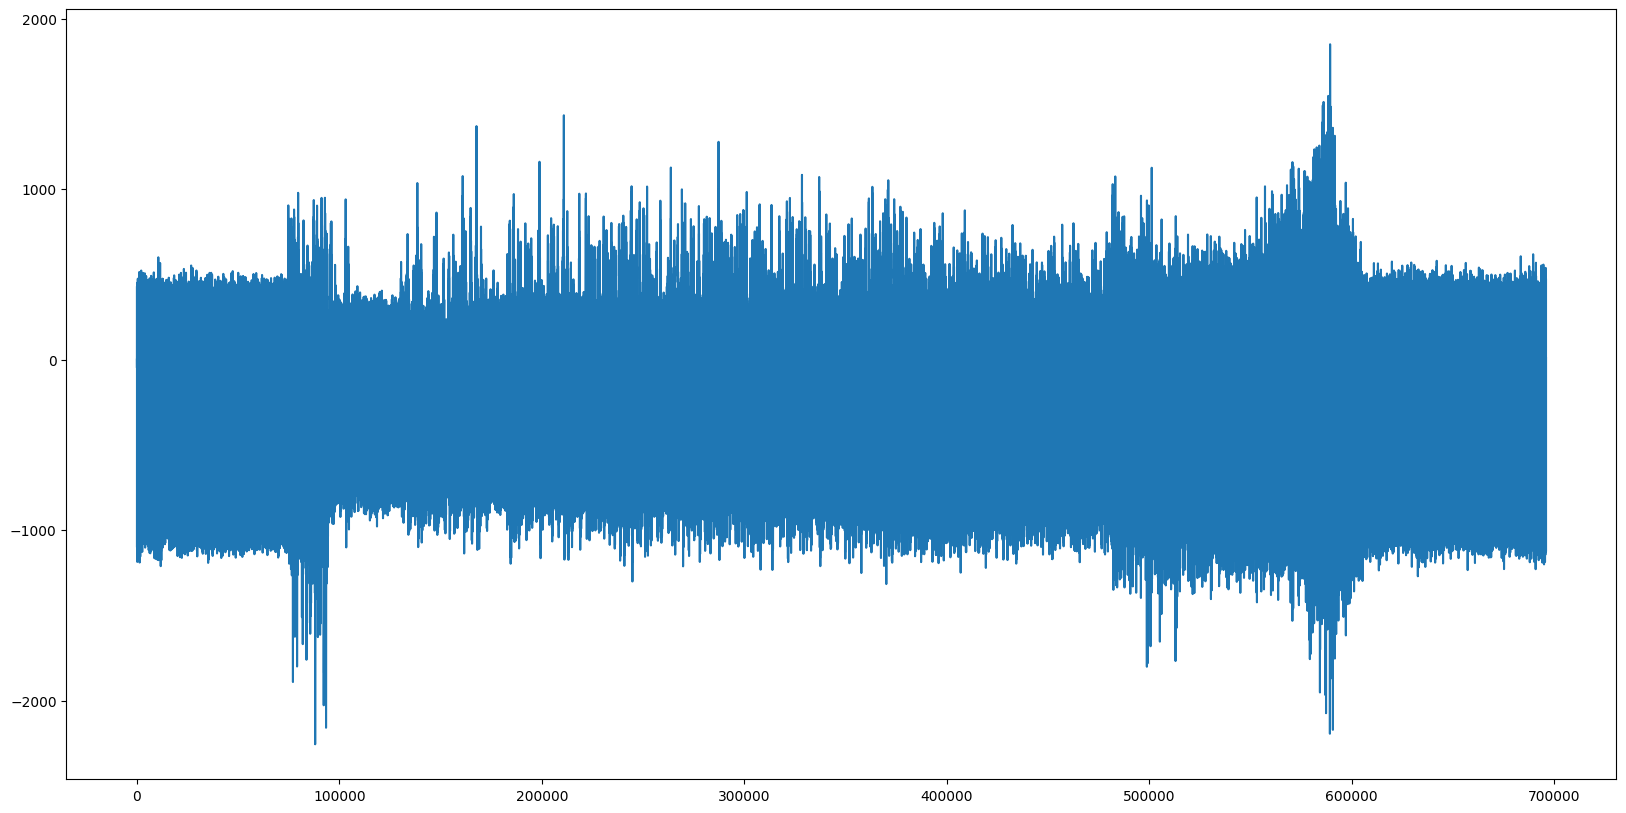

In [23]:
walking_ecg_filtered = ecg_data_filtering.lowpass_filter(walking_ecg_concate, order=5)
walking_ecg_filtered = ecg_data_filtering.bandstop_filter(walking_ecg_filtered, order=5)

plt.figure(figsize=(20, 10))
plt.plot(walking_ecg_filtered)
plt.show()

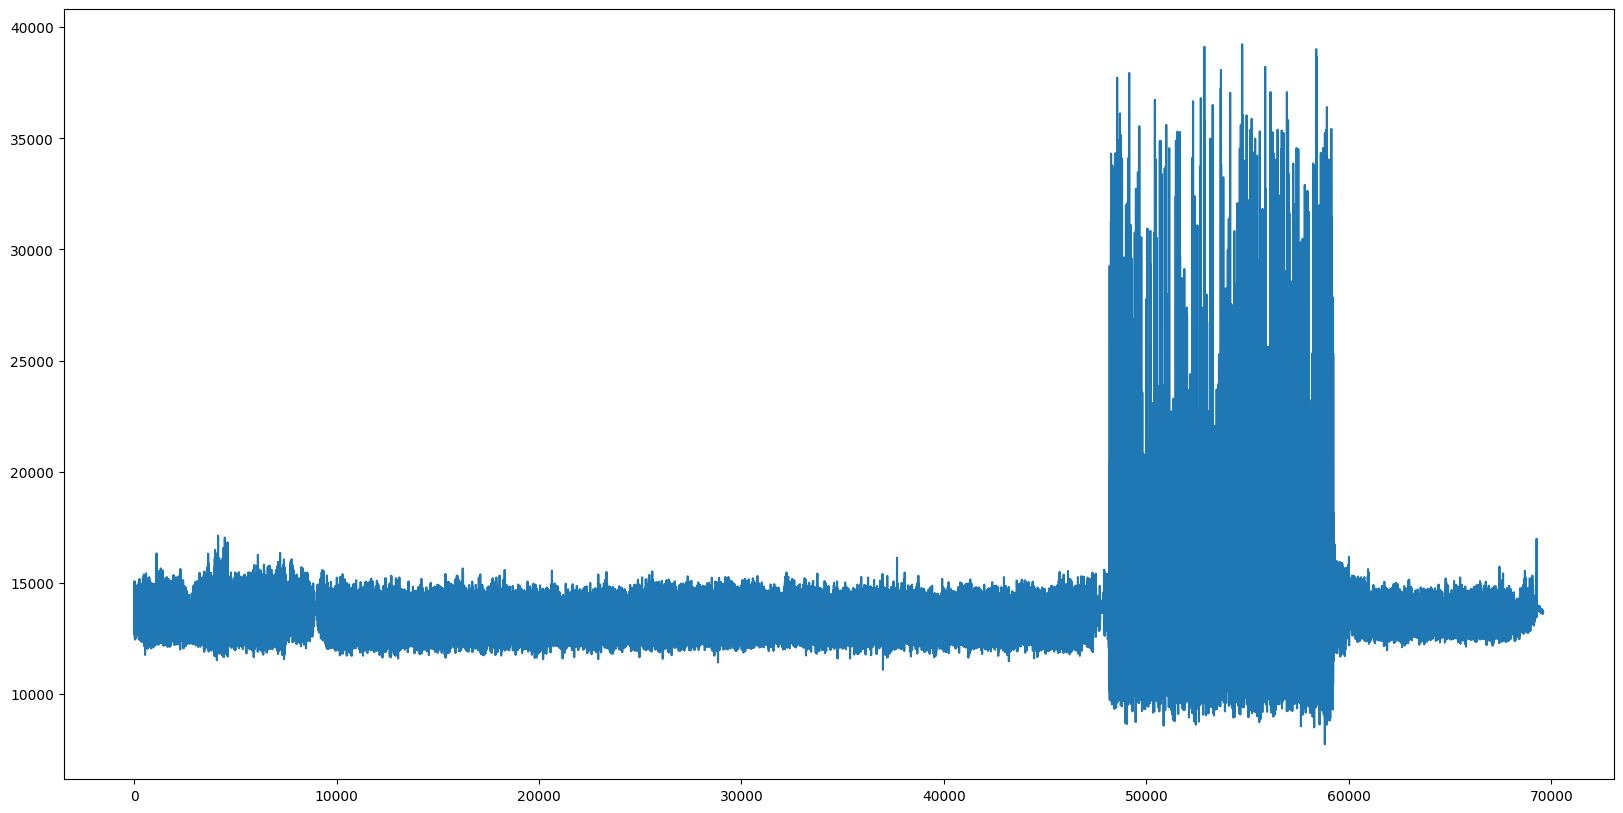

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(walking_acc_concate)
plt.show()

In [25]:
one_minute_walking_ecg = dataloader.export_ecg_1min(walking_ecg_filtered ** 2)
one_minute_walking_acc = dataloader.export_acc_1min(walking_acc_concate)

for idx in range(len(one_minute_walking_ecg)):
    print(f"{idx}th 1 minute walking ecg data shape:", end='')
    print(np.shape(one_minute_walking_ecg[idx]))

for idx in range(len(one_minute_walking_acc)):
    print(f"{idx}th 1 minute walking acc data shape:", end='')
    print(np.shape(one_minute_walking_acc[idx]))

0th 1 minute walking ecg data shape:(15000,)
1th 1 minute walking ecg data shape:(15000,)
2th 1 minute walking ecg data shape:(15000,)
3th 1 minute walking ecg data shape:(15000,)
4th 1 minute walking ecg data shape:(15000,)
5th 1 minute walking ecg data shape:(15000,)
6th 1 minute walking ecg data shape:(15000,)
7th 1 minute walking ecg data shape:(15000,)
8th 1 minute walking ecg data shape:(15000,)
9th 1 minute walking ecg data shape:(15000,)
10th 1 minute walking ecg data shape:(15000,)
11th 1 minute walking ecg data shape:(15000,)
12th 1 minute walking ecg data shape:(15000,)
13th 1 minute walking ecg data shape:(15000,)
14th 1 minute walking ecg data shape:(15000,)
15th 1 minute walking ecg data shape:(15000,)
16th 1 minute walking ecg data shape:(15000,)
17th 1 minute walking ecg data shape:(15000,)
18th 1 minute walking ecg data shape:(15000,)
19th 1 minute walking ecg data shape:(15000,)
20th 1 minute walking ecg data shape:(15000,)
21th 1 minute walking ecg data shape:(15000,

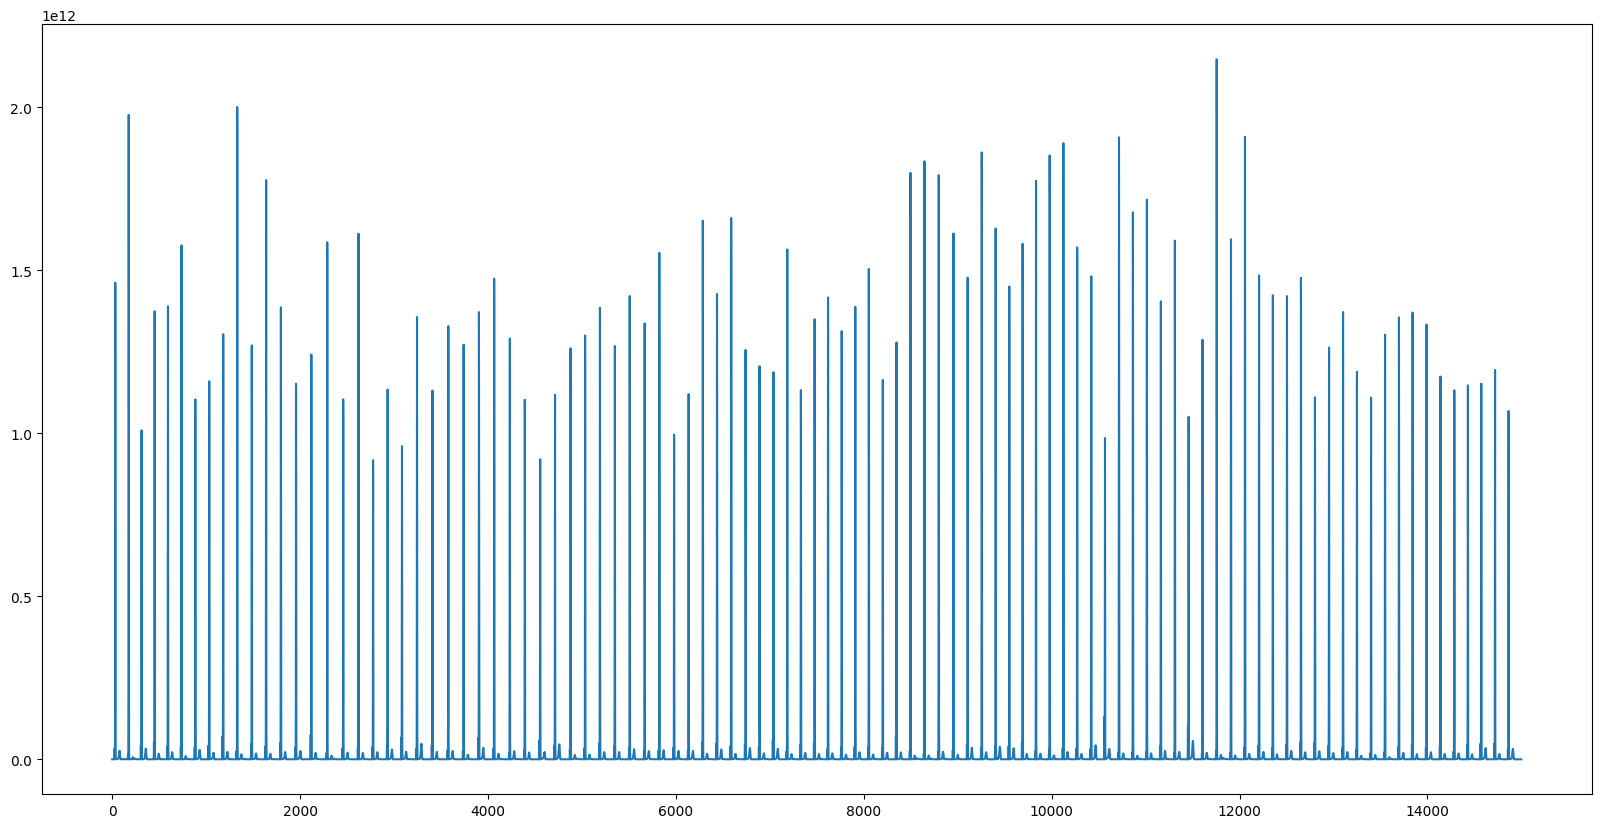

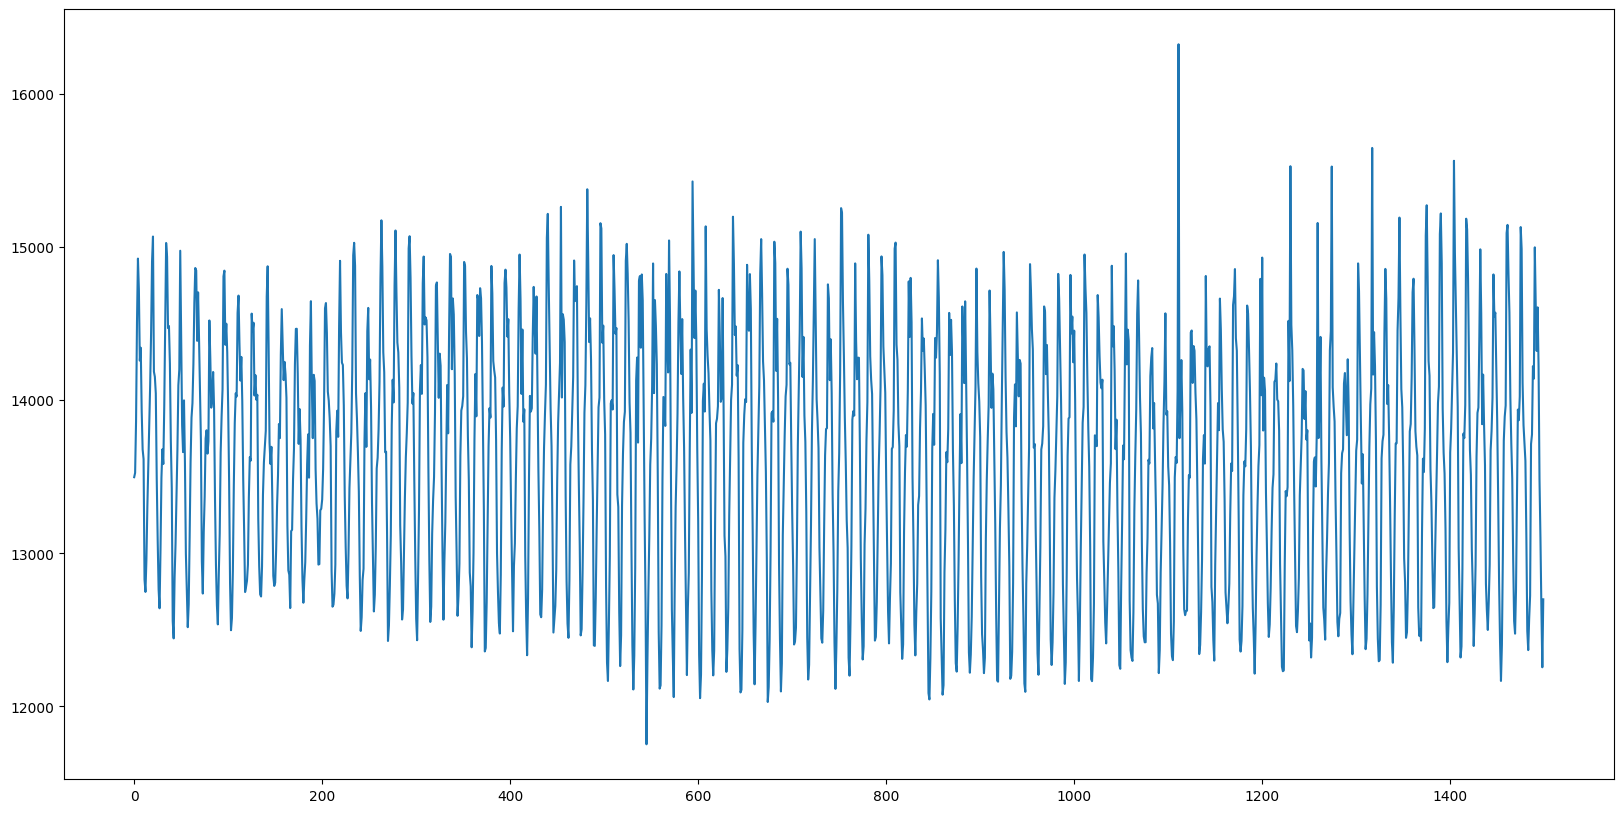

In [26]:
# R-peak detection
plt.figure(figsize=(20, 10))
plt.plot(one_minute_walking_ecg[0])
plt.show()

# Accelometer data visualization
plt.figure(figsize=(20, 10))
plt.plot(one_minute_walking_acc[0])
plt.show()


In [27]:
# Walking ECG
with gzip.open(DATA_EXPORT_PATH + "/walking_ecg.pkl", "wb") as f:
    pickle.dump(one_minute_walking_ecg, f)

# Walking ACC
with gzip.open(DATA_EXPORT_PATH + "/walking_acc.pkl", "wb") as f:
    pickle.dump(one_minute_walking_acc, f)

## Running data concating

In [28]:
running_ecg_concate, running_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in running_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    running_ecg_concate = np.concatenate((running_ecg_concate, ecg), axis=0)
    running_acc_concate = np.concatenate((running_acc_concate, acc), axis=0)

running_ecg_concate, running_acc_concate = np.array(running_ecg_concate[1:]), np.array(running_acc_concate[1:])

print(np.shape(running_ecg_concate))
print(np.shape(running_acc_concate))

MOBILE ./data/running/mobile_ground_running_1.txt
NON Mobile ./data/running/machine_running_test2.txt
NON Mobile ./data/running/machine_running_test1.txt
(304900,)
(30490,)


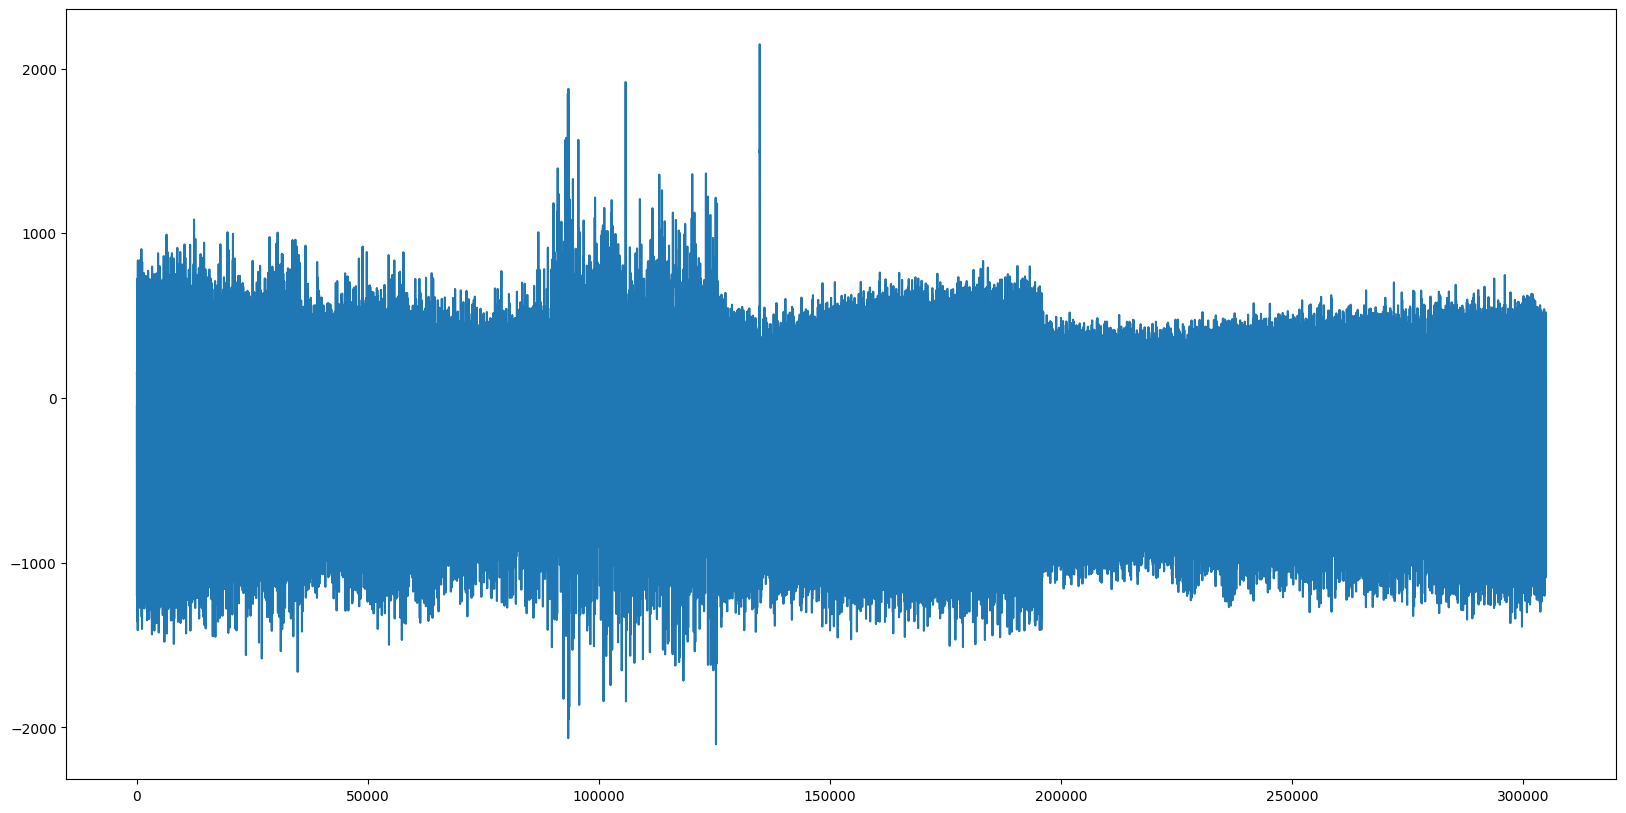

In [29]:
running_ecg_filtered = ecg_data_filtering.lowpass_filter(running_ecg_concate, order=5)
running_ecg_filtered = ecg_data_filtering.bandstop_filter(running_ecg_filtered, order=5)

plt.figure(figsize=(20, 10))
plt.plot(running_ecg_filtered)
plt.show()

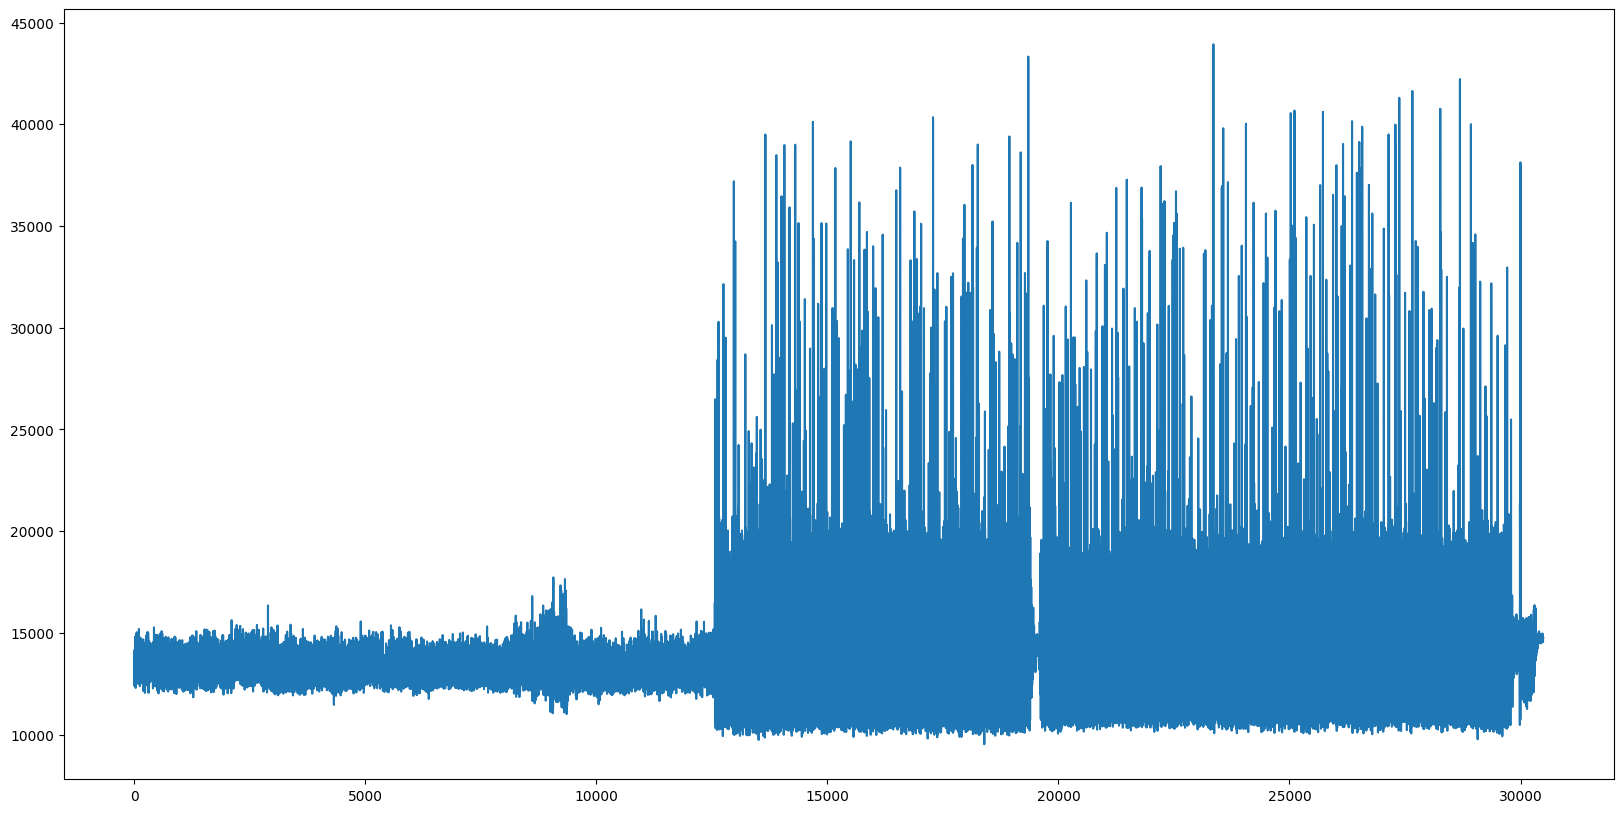

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(running_acc_concate)
plt.show()

In [31]:
one_minute_running_ecg = dataloader.export_ecg_1min(running_ecg_filtered)
one_minute_running_acc = dataloader.export_acc_1min(running_acc_concate)

for idx in range(len(one_minute_running_ecg)):
    print(f"{idx}th ECG data shape : ", end='')
    print(np.shape(one_minute_running_ecg[idx]))

for idx in range(len(one_minute_running_acc)):
    print(f"{idx}th ACC data shape : ", end='')
    print(np.shape(one_minute_running_acc[idx]))

0th ECG data shape : (15000,)
1th ECG data shape : (15000,)
2th ECG data shape : (15000,)
3th ECG data shape : (15000,)
4th ECG data shape : (15000,)
5th ECG data shape : (15000,)
6th ECG data shape : (15000,)
7th ECG data shape : (15000,)
8th ECG data shape : (15000,)
9th ECG data shape : (15000,)
10th ECG data shape : (15000,)
11th ECG data shape : (15000,)
12th ECG data shape : (15000,)
13th ECG data shape : (15000,)
14th ECG data shape : (15000,)
15th ECG data shape : (15000,)
16th ECG data shape : (15000,)
17th ECG data shape : (15000,)
18th ECG data shape : (15000,)
0th ACC data shape : (1500,)
1th ACC data shape : (1500,)
2th ACC data shape : (1500,)
3th ACC data shape : (1500,)
4th ACC data shape : (1500,)
5th ACC data shape : (1500,)
6th ACC data shape : (1500,)
7th ACC data shape : (1500,)
8th ACC data shape : (1500,)
9th ACC data shape : (1500,)
10th ACC data shape : (1500,)
11th ACC data shape : (1500,)
12th ACC data shape : (1500,)
13th ACC data shape : (1500,)
14th ACC da

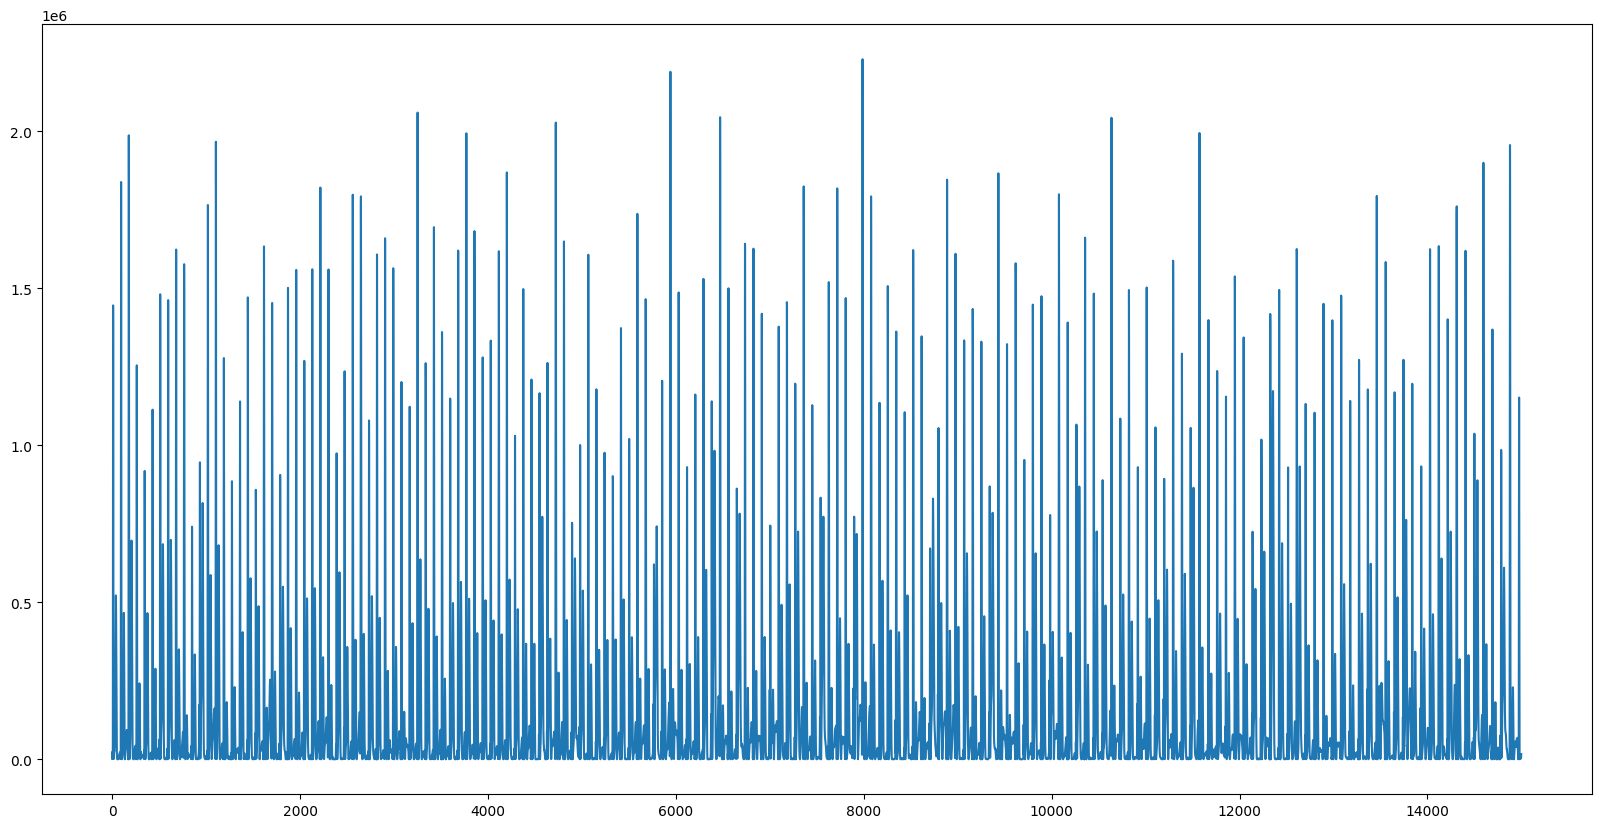

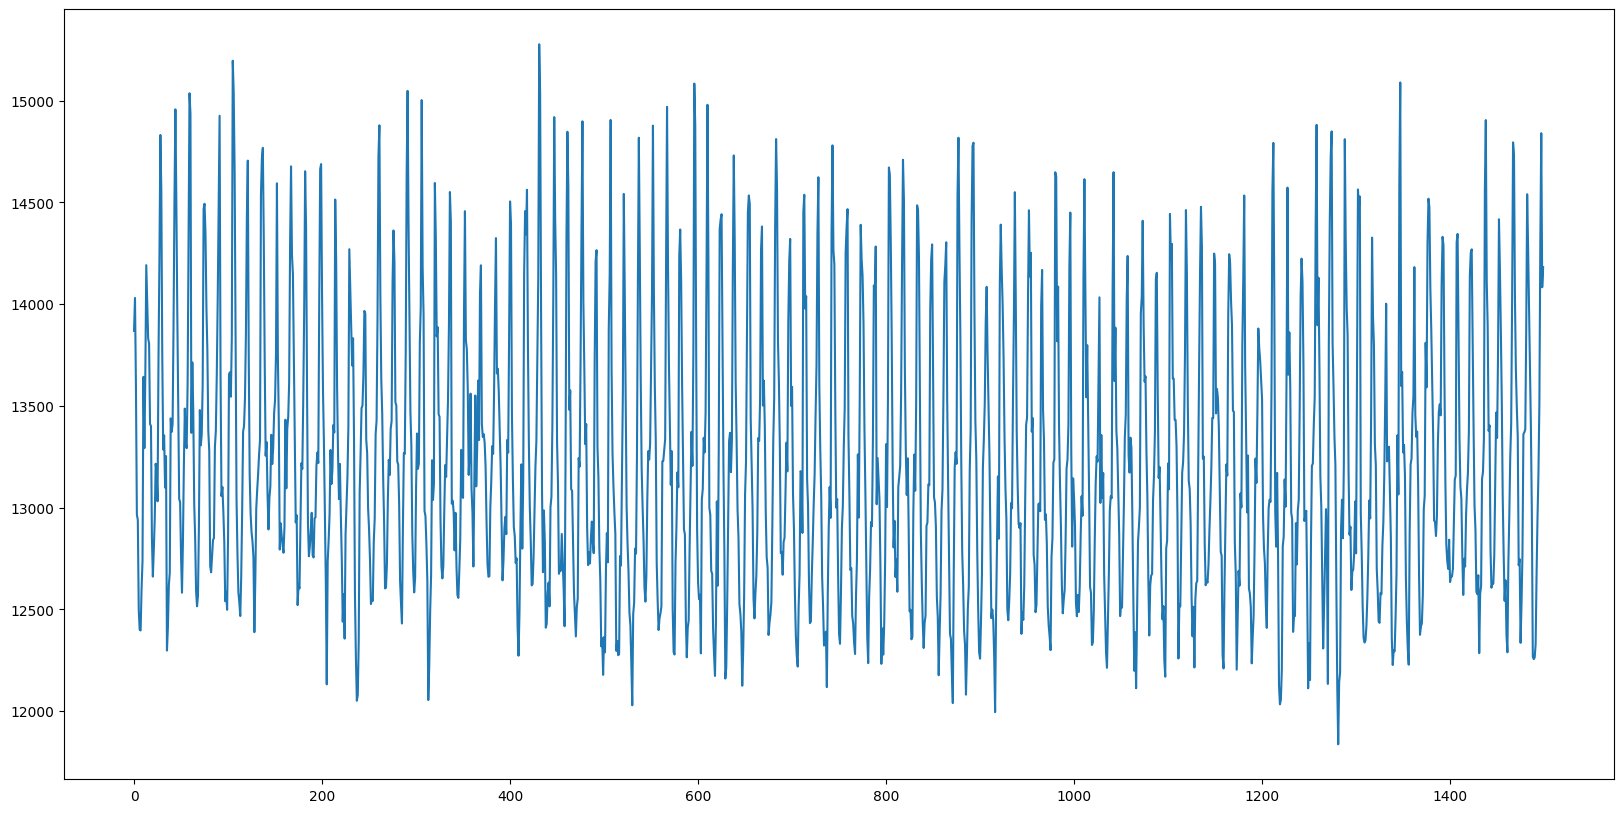

In [32]:
# R-peak detection
detectors = Detectors(250)
r_peaks = detectors.pan_tompkins_detector(one_minute_running_ecg[0])

plt.figure(figsize=(20, 10))
plt.plot(one_minute_running_ecg[0])
plt.show()

# Accelometer data visualization
plt.figure(figsize=(20, 10))
plt.plot(one_minute_running_acc[0])
plt.show()

In [33]:
# Running ECG
with gzip.open(DATA_EXPORT_PATH + "/running_ecg.pkl", "wb") as f:
    pickle.dump(one_minute_running_ecg, f)

# Running ACC
with gzip.open(DATA_EXPORT_PATH + "/running_acc.pkl", "wb") as f:
    pickle.dump(one_minute_running_acc, f)

## Sitting data concating

In [34]:
sitting_ecg_concate, sitting_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in sitting_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    sitting_ecg_concate = np.concatenate((sitting_ecg_concate, ecg), axis=0)
    sitting_acc_concate = np.concatenate((sitting_acc_concate, acc), axis=0)

sitting_ecg_concate, sitting_acc_concate = np.array(sitting_ecg_concate[1:]), np.array(sitting_acc_concate[1:])

print(np.shape(sitting_ecg_concate))
print(np.shape(sitting_acc_concate))

NON Mobile ./data/sitting/relax_sitting_status.txt
(230650,)
(23065,)


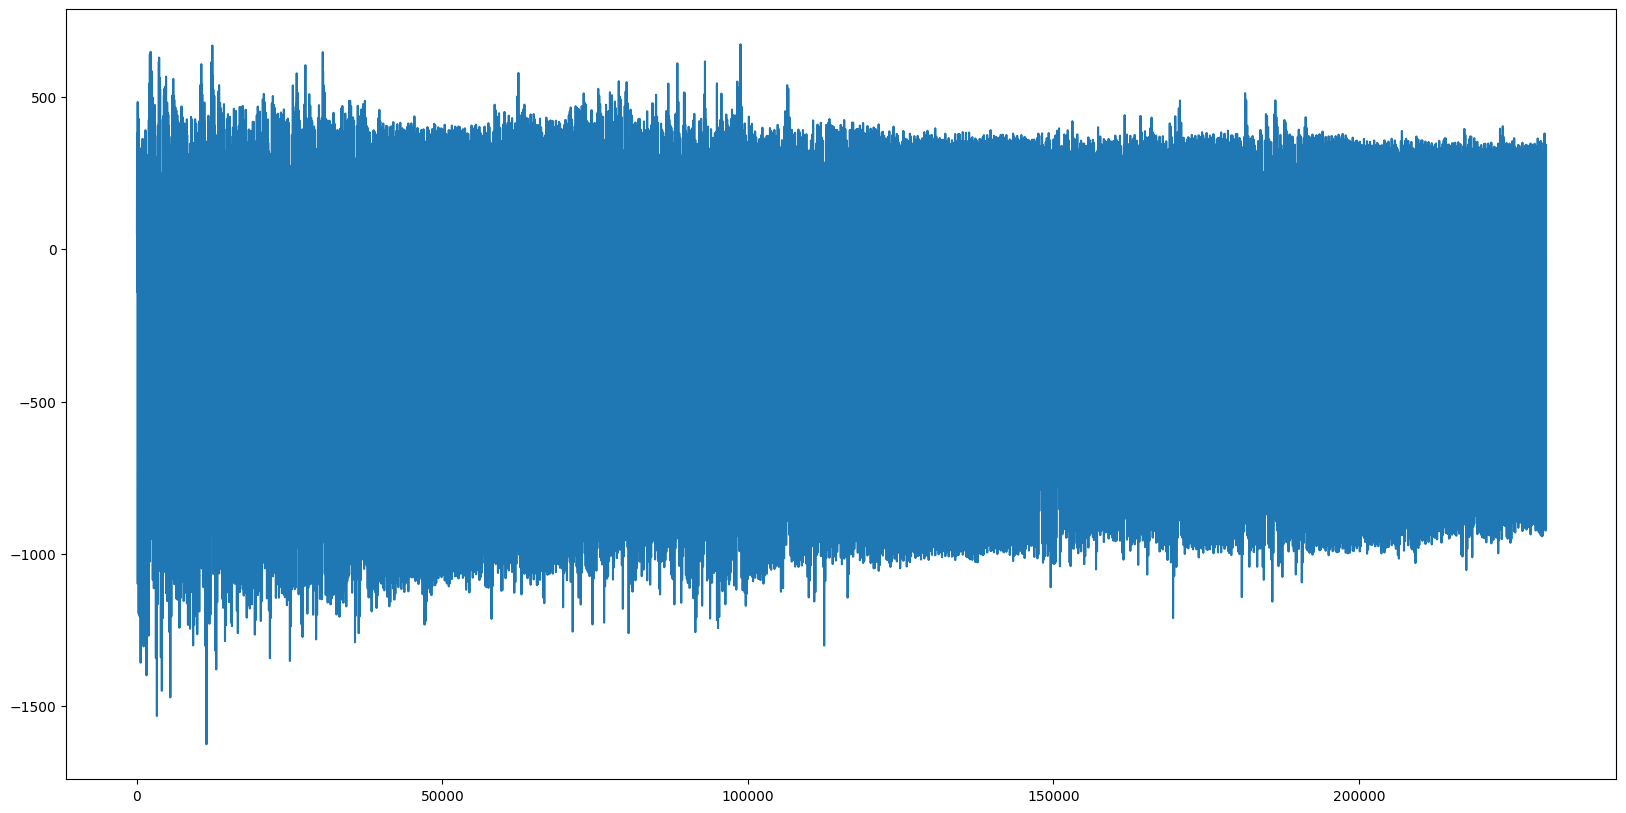

In [35]:
sitting_ecg_filtered = ecg_data_filtering.lowpass_filter(sitting_ecg_concate, order=5)
sitting_ecg_filtered = ecg_data_filtering.bandstop_filter(sitting_ecg_filtered, order=5)

plt.figure(figsize=(20, 10))
plt.plot(sitting_ecg_filtered)
plt.show()

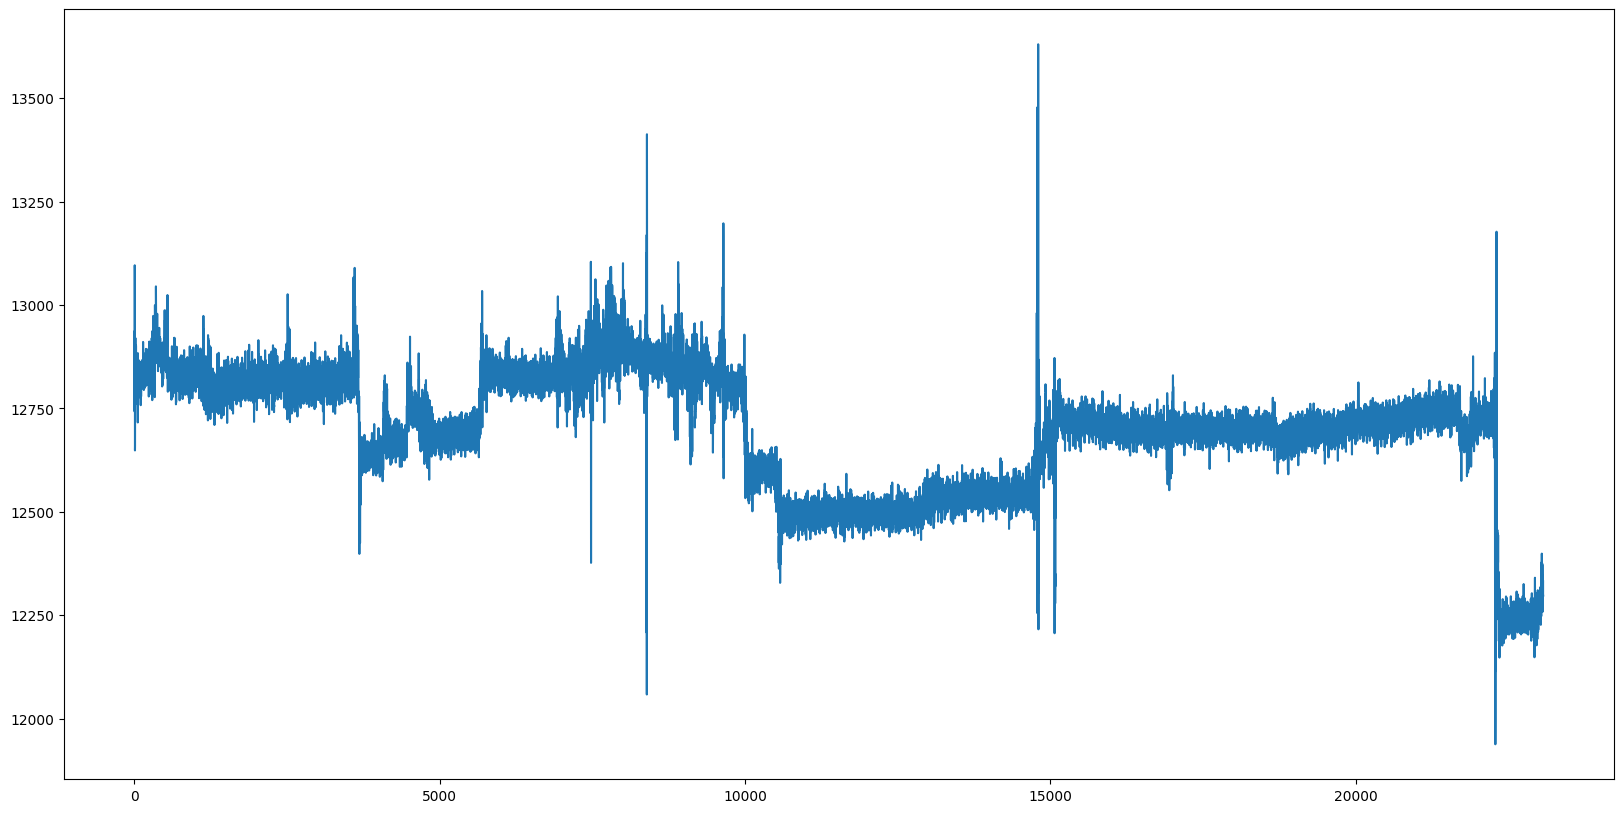

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(sitting_acc_concate)
plt.show()

In [37]:
sitting_ecg_one_minute = dataloader.export_ecg_1min(sitting_ecg_filtered)
sitting_acc_one_minute = dataloader.export_acc_1min(sitting_acc_concate)

for idx in range(len(sitting_ecg_one_minute)):
    print(f"{idx}th ECG data shape : ", end='')
    print(np.shape(sitting_ecg_one_minute[idx]))

for idx in range(len(sitting_acc_one_minute)):
    print(f"{idx}th ACC data shape : ", end='')
    print(np.shape(sitting_acc_one_minute[idx]))


0th ECG data shape : (15000,)
1th ECG data shape : (15000,)
2th ECG data shape : (15000,)
3th ECG data shape : (15000,)
4th ECG data shape : (15000,)
5th ECG data shape : (15000,)
6th ECG data shape : (15000,)
7th ECG data shape : (15000,)
8th ECG data shape : (15000,)
9th ECG data shape : (15000,)
10th ECG data shape : (15000,)
11th ECG data shape : (15000,)
12th ECG data shape : (15000,)
13th ECG data shape : (15000,)
0th ACC data shape : (1500,)
1th ACC data shape : (1500,)
2th ACC data shape : (1500,)
3th ACC data shape : (1500,)
4th ACC data shape : (1500,)
5th ACC data shape : (1500,)
6th ACC data shape : (1500,)
7th ACC data shape : (1500,)
8th ACC data shape : (1500,)
9th ACC data shape : (1500,)
10th ACC data shape : (1500,)
11th ACC data shape : (1500,)
12th ACC data shape : (1500,)
13th ACC data shape : (1500,)


In [38]:
# Sitting ECG
with gzip.open(DATA_EXPORT_PATH + "/sitting_ecg.pkl", "wb") as f:
    pickle.dump(sitting_ecg_one_minute, f)

# Sitting ACC
with gzip.open(DATA_EXPORT_PATH + "/sitting_acc.pkl", "wb") as f:
    pickle.dump(sitting_acc_one_minute, f)